In [68]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [69]:
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'numpy version: {np.__version__}')

pandas version: 2.2.2
seaborn version: 0.13.2
numpy version: 2.0.2


In [70]:
url = 'https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/source-data/big-mac-source-data-v2.csv'
df = pd.read_csv(url, parse_dates=['date'])

df_100 = df.head(2000) #การดึงข้อมูล
df_100


,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date
0,Argentina,ARG,ARS,2.50,1.0000,9283.175,9283.175,2000-04-01
1,Australia,AUS,AUD,2.59,1.6800,20394.027,32402.454,2000-04-01
2,Brazil,BRA,BRL,2.95,1.7900,5123.549,5941.865,2000-04-01
3,Canada,CAN,CAD,2.85,1.4700,21046.556,31222.677,2000-04-01
4,Switzerland,CHE,CHF,5.90,1.7000,42737.474,61961.359,2000-04-01
...,...,...,...,...,...,...,...,...
1995,Oman,OMN,OMR,1.42,0.3850,19458.452,7481.775,2023-01-01
1996,Pakistan,PAK,PKR,780.00,230.2000,1565.575,250847.859,2023-01-01
1997,Peru,PER,PEN,13.90,3.8847,6852.501,26589.133,2023-01-01
1998,Philippines,PHL,PHP,155.00,54.4350,3580.009,176331.904,2023-01-01


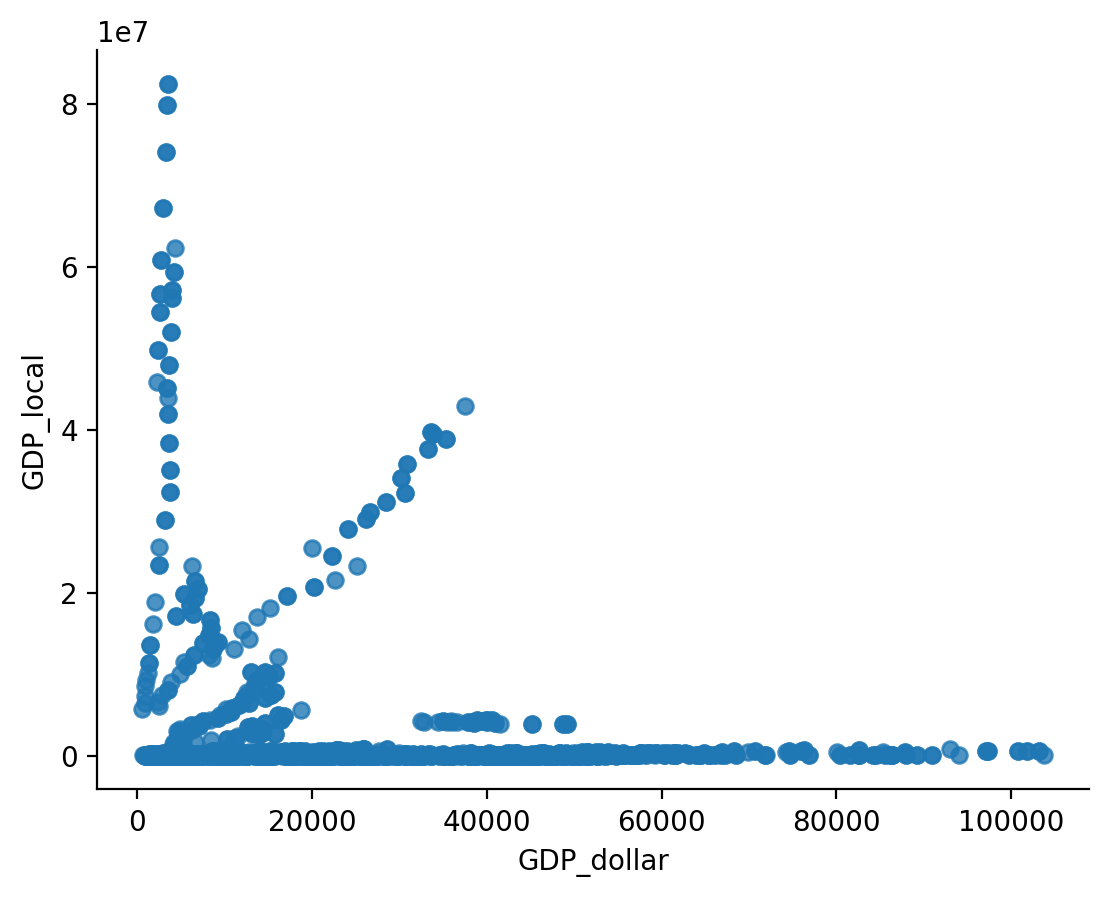

In [71]:
from matplotlib import pyplot as plt
df_100.plot(kind='scatter', x='GDP_dollar', y='GDP_local', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   name           2302 non-null   object        
 1   iso_a3         2302 non-null   object        
 2   currency_code  2302 non-null   object        
 3   local_price    2302 non-null   float64       
 4   dollar_ex      2302 non-null   float64       
 5   GDP_dollar     2301 non-null   float64       
 6   GDP_local      2279 non-null   float64       
 7   date           2302 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 144.0+ KB


In [73]:
# เลือกข้อมูลเดือน มกราคม ปี 2020
df = df[(df['date'].dt.year == 2020) & (df['date'].dt.month == 1)]

df.head()


,name,iso_a3,currency_code,local_price,dollar_ex,GDP_dollar,GDP_local,date
1514,United Arab Emirates,ARE,AED,14.75,3.673150,45591.680,167435.443,2020-01-14
1515,Argentina,ARG,ARS,171.00,60.065600,11786.433,331385.005,2020-01-14
1516,Australia,AUS,AUD,6.45,1.449065,56441.271,75442.076,2020-01-14
1517,Austria,AUT,EUR,3.84,0.899159,51234.477,43364.290,2020-01-14
1518,Azerbaijan,AZE,AZN,3.95,1.696500,4759.796,8091.654,2020-01-14


In [74]:
df['dollar_price'] = df['local_price'] / df['dollar_ex']

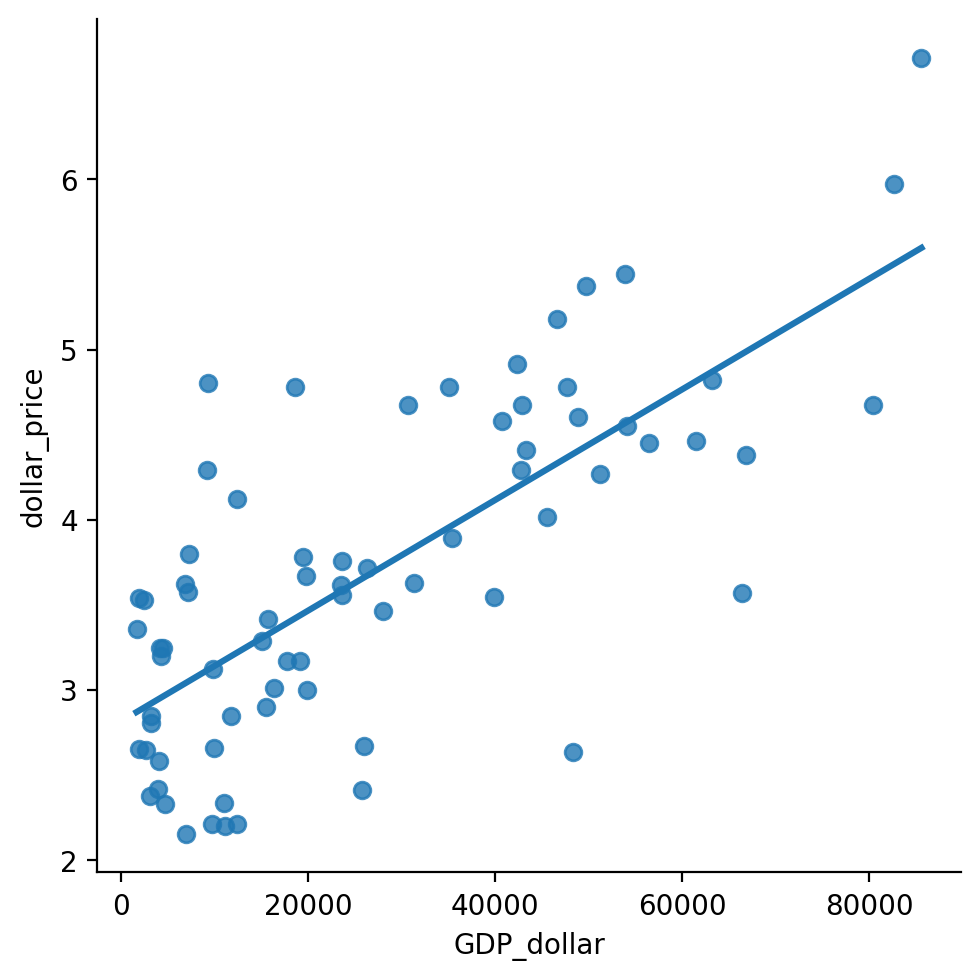

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='GDP_dollar', y='dollar_price', data=df, ci=None)
plt.show()

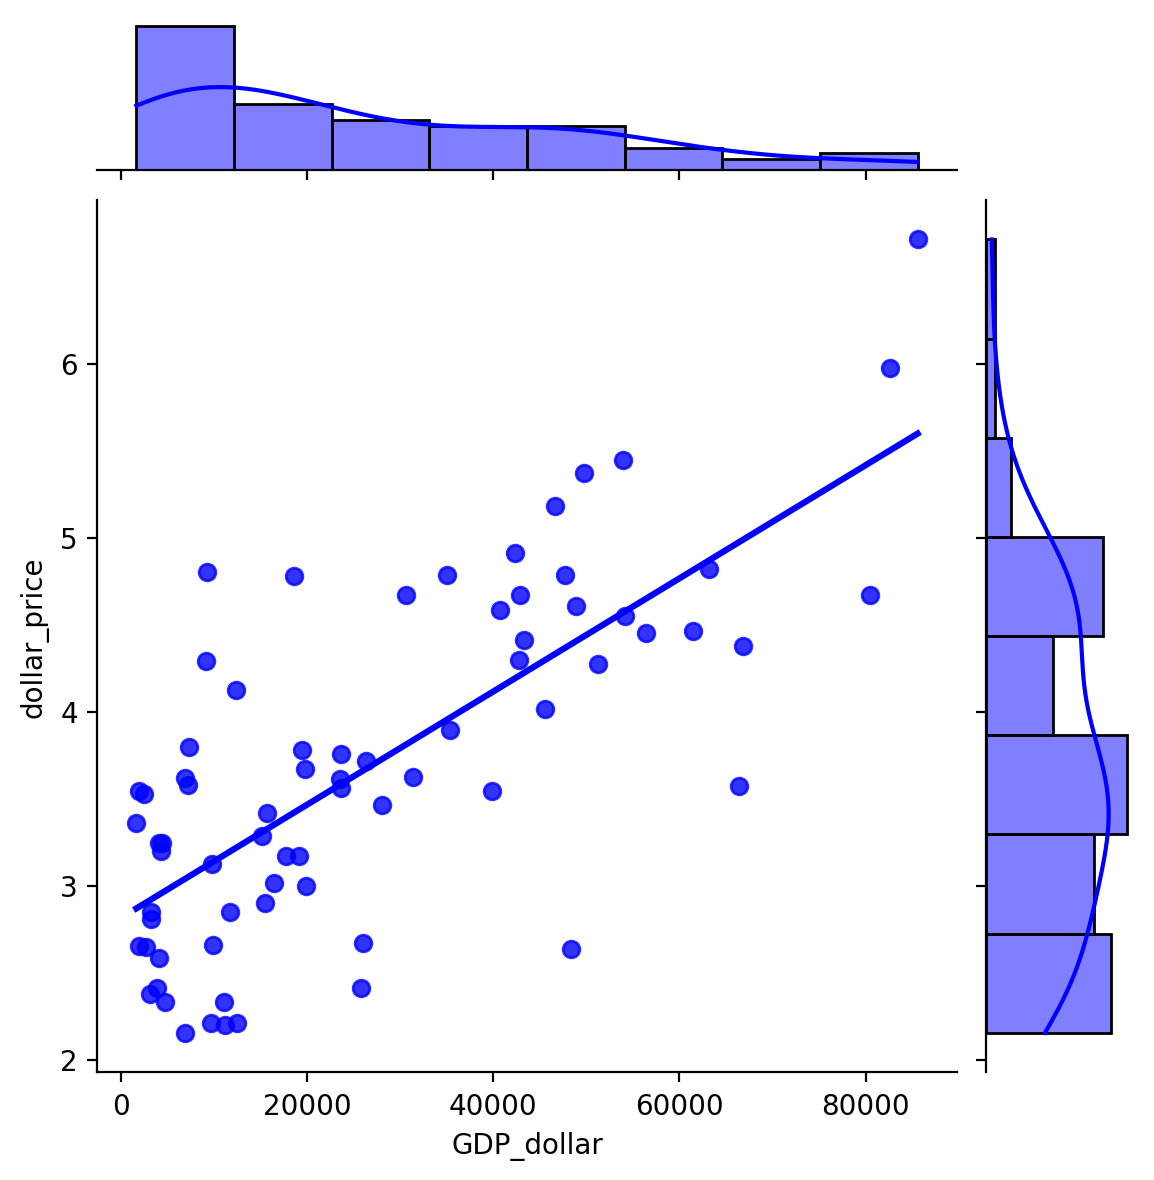

In [76]:
sns.jointplot(x='GDP_dollar', y='dollar_price',data=df, kind='reg', ci=None ,color='blue')
plt.show()